In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [3]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

In [7]:
adam = Adam(learning_rate=0.001)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

### Data Augmentation for more data and Better results.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('datasets/dog_vs_cat/training_set/',
                                             target_size=(64,64),
                                             batch_size=32,  --
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory('datasets/dog_vs_cat/test_set/',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam

In [10]:
classifier.fit(train_set, 
                        epochs = 200,
                        validation_data = test_set,
                        validation_steps = 20, 
                        );



C:\Users\mtabishk\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
250/250 [==============================] - 31s 121ms/step - loss: 0.6625 - accuracy: 0.5935 - val_loss: 0.6996 - val_accuracy: 0.5906
Epoch 2/200
250/250 [==============================] - 30s 119ms/step - loss: 0.6008 - accuracy: 0.6744 - val_loss: 0.5955 - val_accuracy: 0.7219
Epoch 3/200
250/250 [==============================] - 29s 116ms/step - loss: 0.5588 - accuracy: 0.7136 - val_loss: 0.6409 - val_accuracy: 0.6719
Epoch 4/200
250/250 [==============================] - 29s 115ms/step - loss: 0.5217 - accuracy: 0.7374 - val_loss: 0.5861 - val_accuracy: 0.7203
Epoch 5/200
250/250 [==============================] - 29s 115ms/step - loss: 0.4933 - accuracy: 0.7609 - val_loss: 0.5532 - val_accuracy: 0.7563
Epoch 6/200
250/250 [==============================] - 29s 115ms/step - loss: 0.4738 - accuracy: 0.7681 - val_loss: 0.5288 - val_accuracy: 0.7437
Epoch 7/200
250/250 [==============================] - 29s 115ms/step - loss: 0.4529 - accuracy: 0.7862 - val_loss: 0.6273 -

Epoch 57/200
250/250 [==============================] - 33s 131ms/step - loss: 0.0339 - accuracy: 0.9866 - val_loss: 1.3212 - val_accuracy: 0.7672
Epoch 58/200
250/250 [==============================] - 34s 135ms/step - loss: 0.0316 - accuracy: 0.9889 - val_loss: 1.3087 - val_accuracy: 0.7828
Epoch 59/200
250/250 [==============================] - 37s 149ms/step - loss: 0.0282 - accuracy: 0.9900 - val_loss: 1.2616 - val_accuracy: 0.8000
Epoch 60/200
250/250 [==============================] - 33s 133ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 1.8663 - val_accuracy: 0.7422
Epoch 61/200
250/250 [==============================] - 30s 120ms/step - loss: 0.0377 - accuracy: 0.9870 - val_loss: 1.5412 - val_accuracy: 0.7734
Epoch 62/200
250/250 [==============================] - 30s 119ms/step - loss: 0.0224 - accuracy: 0.9919 - val_loss: 1.5241 - val_accuracy: 0.7703
Epoch 63/200
250/250 [==============================] - 30s 120ms/step - loss: 0.0228 - accuracy: 0.9923 - val_loss: 1

250/250 [==============================] - 28s 114ms/step - loss: 0.0063 - accuracy: 0.9976 - val_loss: 2.1436 - val_accuracy: 0.7781
Epoch 168/200
250/250 [==============================] - 28s 114ms/step - loss: 0.0270 - accuracy: 0.9924 - val_loss: 1.6129 - val_accuracy: 0.8062
Epoch 169/200
250/250 [==============================] - 29s 114ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 2.2725 - val_accuracy: 0.7812
Epoch 170/200
250/250 [==============================] - 29s 114ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 1.8177 - val_accuracy: 0.8016
Epoch 171/200
250/250 [==============================] - 29s 115ms/step - loss: 0.0204 - accuracy: 0.9945 - val_loss: 2.2459 - val_accuracy: 0.7734
Epoch 172/200
250/250 [==============================] - 29s 114ms/step - loss: 0.0081 - accuracy: 0.9967 - val_loss: 2.4360 - val_accuracy: 0.7484
Epoch 173/200
250/250 [==============================] - 29s 115ms/step - loss: 0.0086 - accuracy: 0.9966 - val_loss: 2.1457 -

In [12]:
classifier.save('models/dogcat_model.h5')  

In [2]:
from tensorflow.keras.models import load_model
classifier = load_model('models/dogcat_model.h5')

### Prediction of image


In [3]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

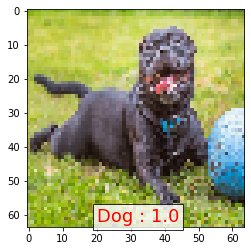

In [4]:
img1 = image.load_img('datasets/dog_vs_cat/test/3.png', target_size=(64, 64)) 
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value = f'Dog : {prediction[0,0]}'
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value = f'Cat : {1.0-prediction[0,0]}'
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [27]:
# Model Accuracy
x1 = classifier.evaluate(train_set)
x2 = classifier.evaluate(test_set)

63/63 [==============================] - 4s 63ms/step - loss: 2.3397 - accuracy: 0.7850


In [28]:
print(f'Training Accuracy  : {x1[1]*100}    Training loss  : {x1[0]}')
print(f'Validation Accuracy: {x2[1]*100}     Validation loss: {x2[0]}')

Training Accuracy  : 99.84999895095825    Training loss  : 0.004359607119113207
Validation Accuracy: 78.50000262260437     Validation loss: 2.339653491973877
